In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/472 [00:00<?, ? examples/s]

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.9111	Val Loss:	1.8155	Accuracy:	0.3361	F1:	0.3069
2 / 30: Train Loss:	1.4345	Val Loss:	1.6299	Accuracy:	0.3109	F1:	0.2847
3 / 30: Train Loss:	1.3593	Val Loss:	1.4376	Accuracy:	0.3277	F1:	0.3122
4 / 30: Train Loss:	1.2371	Val Loss:	1.3733	Accuracy:	0.3613	F1:	0.3411
5 / 30: Train Loss:	1.1944	Val Loss:	1.3125	Accuracy:	0.3697	F1:	0.3458
6 / 30: Train Loss:	1.1725	Val Loss:	1.2594	Accuracy:	0.3613	F1:	0.3354
7 / 30: Train Loss:	1.0942	Val Loss:	1.2304	Accuracy:	0.4622	F1:	0.4496
8 / 30: Train Loss:	1.0965	Val Loss:	1.2055	Accuracy:	0.4538	F1:	0.4397
9 / 30: Train Loss:	1.0998	Val Loss:	1.1789	Accuracy:	0.4538	F1:	0.4424
10 / 30: Train Loss:	1.0652	Val Loss:	1.1592	Accuracy:	0.4874	F1:	0.4828
11 / 30: Train Loss:	1.0039	Val Loss:	1.1425	Accuracy:	0.4874	F1:	0.4881
12 / 30: Train Loss:	1.0081	Val Loss:	1.1096	Accuracy:	0.5378	F1:	0.5266
13 / 30: Train Loss:	1.0517	Val Loss:	1.0973	Accuracy:	0.5378	F1:	0.5367
14 / 30: Train Loss:	0.9961	Val Loss:	1.0836	Accuracy:	0.537

Map:   0%|          | 0/67 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.7931	Val Loss:	1.2479	Accuracy:	0.4034	F1:	0.3648
2 / 30: Train Loss:	1.1408	Val Loss:	1.1632	Accuracy:	0.3950	F1:	0.3308
3 / 30: Train Loss:	1.0767	Val Loss:	1.1434	Accuracy:	0.4622	F1:	0.4635
4 / 30: Train Loss:	1.0465	Val Loss:	1.1130	Accuracy:	0.5126	F1:	0.5079
5 / 30: Train Loss:	0.9893	Val Loss:	1.0398	Accuracy:	0.5966	F1:	0.5995
6 / 30: Train Loss:	0.9277	Val Loss:	0.9947	Accuracy:	0.5882	F1:	0.5912
7 / 30: Train Loss:	0.8265	Val Loss:	0.9249	Accuracy:	0.6387	F1:	0.6425
8 / 30: Train Loss:	0.7818	Val Loss:	0.8767	Accuracy:	0.6891	F1:	0.6918
9 / 30: Train Loss:	0.6838	Val Loss:	0.9573	Accuracy:	0.6134	F1:	0.6164
10 / 30: Train Loss:	0.6011	Val Loss:	0.8284	Accuracy:	0.7143	F1:	0.7152
11 / 30: Train Loss:	0.5737	Val Loss:	0.7991	Accuracy:	0.7143	F1:	0.7160
12 / 30: Train Loss:	0.4977	Val Loss:	1.0143	Accuracy:	0.6387	F1:	0.6429
13 / 30: Train Loss:	0.4777	Val Loss:	1.0066	Accuracy:	0.6807	F1:	0.6813
14 / 30: Train Loss:	0.3599	Val Loss:	1.1045	Accuracy:	0.680

Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.9721	Val Loss:	1.2578	Accuracy:	0.3025	F1:	0.2328
2 / 30: Train Loss:	1.3151	Val Loss:	1.2343	Accuracy:	0.4454	F1:	0.3372
3 / 30: Train Loss:	1.1831	Val Loss:	1.1606	Accuracy:	0.4286	F1:	0.3460
4 / 30: Train Loss:	1.1341	Val Loss:	1.1150	Accuracy:	0.4538	F1:	0.4000
5 / 30: Train Loss:	1.0760	Val Loss:	1.0978	Accuracy:	0.5042	F1:	0.4563
6 / 30: Train Loss:	1.0661	Val Loss:	1.0814	Accuracy:	0.5126	F1:	0.4992
7 / 30: Train Loss:	1.0018	Val Loss:	1.0529	Accuracy:	0.5630	F1:	0.5680
8 / 30: Train Loss:	0.9192	Val Loss:	0.9656	Accuracy:	0.6471	F1:	0.6503
9 / 30: Train Loss:	0.8200	Val Loss:	0.8671	Accuracy:	0.5966	F1:	0.6003
10 / 30: Train Loss:	0.6729	Val Loss:	0.8393	Accuracy:	0.6471	F1:	0.6455
11 / 30: Train Loss:	0.6028	Val Loss:	0.8385	Accuracy:	0.6807	F1:	0.6817
12 / 30: Train Loss:	0.4844	Val Loss:	0.9439	Accuracy:	0.6639	F1:	0.6642
13 / 30: Train Loss:	0.4609	Val Loss:	0.8794	Accuracy:	0.6975	F1:	0.6991
14 / 30: Train Loss:	0.3004	Val Loss:	1.2397	Accuracy:	0.689

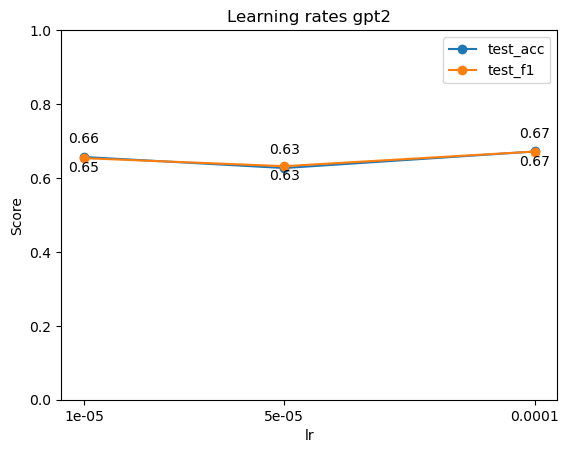

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=False)

In [6]:
%reset -f